# APS1070
#### Basic Principles and Models - Project 1
**Deadline: May 31, 23:00 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: **Jiani Jia**   *(here and elsewhere, please replace the underscore with your answer)*

Student ID: **1002226245**

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's take the tools we have learned in the tutorial and put them into practice on a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [0]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

## Part 1: Getting started [6 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? 
   
   **Total 30 features**
* What are the target classes? 
  
  **Malignant and Benign**
* What do these target classes signify?  
  
  **A label for each patient, 0 means Malignant and 1 means Benign**
* How many participants tested `Malignant`? 
  
  **212**
* How many participants tested `Benign`? 
  
  **357**

In [2]:
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
## Take a look at data,target and feature_name
dataset.data
dataset.target
dataset.feature_names
## Create a Pandas DataFrame containing the data and the targets
df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
df['Target']= dataset.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
## Count the tested Malignant and Benign
print("Number of features",dataset.feature_names.size)
print("Name of the target class", dataset.target_names)
print("The number of Malignant", df[df['Target'] == 0].shape[0])
print("The number of Benign", df[df['Target'] == 1].shape[0])

Number of features 30
Name of the target class ['malignant' 'benign']
The number of Malignant 212
The number of Benign 357


Use `seaborn.implot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[2]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. **[2]**

Standardize the data and plot those features again. **[1]**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


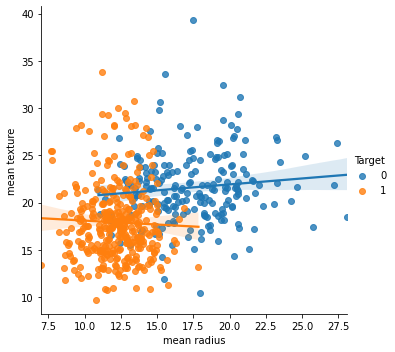

In [4]:
### YOUR CODE HERE ###
## Plot the x-axis is "mean radius" and y-axis is "mean texture", color of each datapoint indicates its class
import seaborn as sns
from sklearn import preprocessing
sns.lmplot(x = "mean radius", y = "mean texture", hue = "Target", data = df)

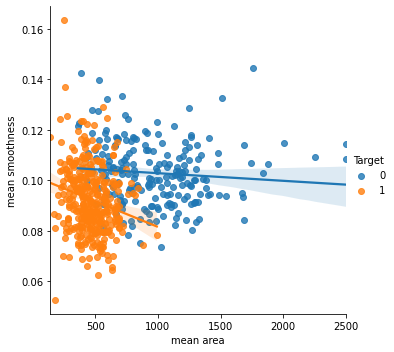

In [5]:
## Do this once again for different features for the x- and y-axis and see how the data is distributed
sns.lmplot(x = "mean area", y = "mean smoothness", hue = "Target", data = df)

#**Comment:**

When x-axis changes to feature "mean area" and y-axis changes to "mean smoothness", keep the same level of the smoothness and we can see the areas for most malignant are larger than benign.

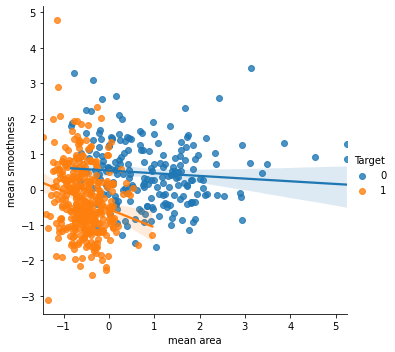

In [6]:
## Standardize the data and plot those features again.
names = df.columns
scaler = preprocessing.StandardScaler()
standard_data = scaler.fit_transform(dataset.data)
standard_df = pd.DataFrame(data = standard_data, columns = dataset.feature_names)
standard_df['Target'] = dataset.target
sns.lmplot(x = "mean area", y = "mean smoothness", hue = "Target", data = standard_df)

#**Comment on standardize data**

Before standardize, the x-axis is in range 0-2500 and y-axis is in range 0-0.17, which are quite different scale ranges. After standardize, the distribution of the data not change but the range of x and y axis become closer, x-axis is from -2 to 5 and y-axis is from -4 to 5.

## Part 2: KNN Classifier [2 Marks]
We are going to create a KNN classifier to predict whether a patient has a malignant or benign tumor. 


It is best practice to have a training set (from which there is a rotating validation subset) and test set. The main aim here is to obtain the best accuracy we can on the test set. To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data you send it (each of the folds is used as validation).

First, split the dataset into a train and a test set (80:20). The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete.
Follow these steps: **[2]**

* Using cross-validation, report mean cross-validation accuracy for a KNN classifier where you sweep k from 1 to 100. **Report your findings on a plot.**

* Base on this plot (that you just ran), find the best 'k' and report your test accuracy.

* Randomly select 5 different 'k', and use them on the test set to see if the cross-validation really found a good 'k' for us.


In [0]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline
## Split the dataset into a train and a test set (80:20)
## Standardize the training dataset and test dataset separate

def datasplit(data):
  X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, test_size = 0.2, random_state = 1)
  scaler.fit(X_train)
  X_stand_train = scaler.transform(X_train)
  X_stand_test = scaler.transform(X_test)
  return X_stand_train, y_train, X_stand_test, y_test

The mean cross-validation accuracies for a KNN classifier in range 1 to 100 are: [0.9604395604395604, 0.9604395604395604, 0.9692307692307693, 0.9604395604395604, 0.964835164835165, 0.9604395604395606, 0.9670329670329672, 0.964835164835165, 0.964835164835165, 0.9670329670329672, 0.9604395604395606, 0.9604395604395606, 0.9538461538461538, 0.9604395604395606, 0.9538461538461538, 0.9582417582417582, 0.9494505494505494, 0.9494505494505494, 0.9472527472527472, 0.9472527472527472, 0.9494505494505494, 0.9538461538461538, 0.9494505494505494, 0.9516483516483516, 0.9516483516483516, 0.9494505494505494, 0.9494505494505494, 0.9516483516483516, 0.9516483516483516, 0.9494505494505494, 0.9472527472527472, 0.9472527472527472, 0.9494505494505494, 0.9516483516483516, 0.9472527472527472, 0.9472527472527472, 0.945054945054945, 0.945054945054945, 0.945054945054945, 0.9472527472527472, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.94

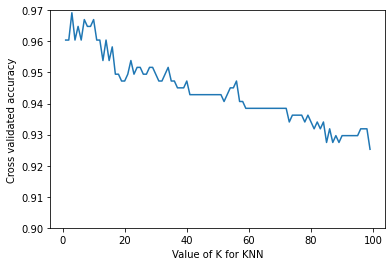

In [8]:
## Complete hyperparameter optimization
cv_scores = []
k_range = range(1,100,1)
X_stand_train = datasplit(dataset.data)[0]
y_train = datasplit(dataset.data)[1]
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_stand_train, y_train, cv = 5, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) # cv_scores is a list contains score mean for each k
## Find the max accuracy and the correspond k value
max_cross_val_score = max(cv_scores) 
max_cross_val_score_classifier = k_range[cv_scores.index(max_cross_val_score)]

## Report your findings on a plot
plt.plot(k_range,cv_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross validated accuracy")
plt.ylim((0.90,0.97))

## Report mean cross-validation accuracy
print("The mean cross-validation accuracies for a KNN classifier in range 1 to 100 are:", cv_scores )
print("The best 'k'(hyperparameter) value in range 1 to 100 is:", max_cross_val_score_classifier ,", the corresponding accuracy is: %0.2f" %(max_cross_val_score*100), "%")

#**Comment:**

The best 'k'(hyperparameter) value in range 1 to 100 is: 3 , the corresponding accuracy is: 96.92 %

(0.0, 20.0)

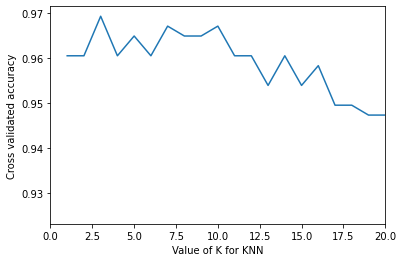

In [9]:
## Zoom in the plot to see k value for the largest accuracy 
plt.plot(k_range,cv_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross validated accuracy")
plt.xlim(0,20)

#**Comment:**

By zooming in the plot we can see the k value is 3 and the accuracy is 96.92%





In [10]:
## Randomly select 5 different 'k', and use them on the test set to see if the cross-validation really found a good 'k' for us.
import random
rand_k = random.sample(range(1, 100), 5)
for k in rand_k:
  knn = neighbors.KNeighborsClassifier(n_neighbors = k)
  scores = cross_val_score(knn, X_stand_train, y_train, cv = 5, scoring = 'accuracy')
  print("When k is", k,"the cross vaildation accuracy is: %0.2f" %(scores.mean()*100), "%")

When k is 88 the cross vaildation accuracy is: 92.97 %
When k is 75 the cross vaildation accuracy is: 93.63 %
When k is 38 the cross vaildation accuracy is: 94.51 %
When k is 65 the cross vaildation accuracy is: 93.85 %
When k is 96 the cross vaildation accuracy is: 93.19 %


## Part 3: Playing with the features [3 Marks]
In the last practice, we used all the features in our dataset to classify the tumors. Now we want to see:  **[3]**
* Are all of these features necessary to get the same level of accuracy on the test set? 
* Is it possible to get better accuracy with fewer features? 
* Which features are essential to get 95\% of the accuracy? The minimum number of features is desired.

You should develop some experiments to investigate the answer of these questions. **For each part summarize your experiments in tables or plots.**

# **Basic Idea**
*   Drop one of the features at each time
*   Calculate the accuracy by applying the remaining features.
*   Put that feature back and choose another one to drop.
*   Calculate the accuracy by applying the remaining feature again.
*   Find the feature that provide the maximum accuracy and drop it from the dataframe.
*   Repeat the steps for the remaining features.


In [33]:
## Calculate the test accuracy for 30 features
feature_all = df.drop(columns = 'Target') 
X_stand_test = datasplit(feature_all)[2]
y_test = datasplit(feature_all)[3]
range_all = range(1,21,1)
list_scores_all = []
for k_all in range_all:
    knn_all = neighbors.KNeighborsClassifier(n_neighbors = k_all)
    scores_all = cross_val_score(knn_all, X_stand_test, y_test, cv = 5, scoring = 'accuracy')
    list_scores_all.append(scores_all.mean())
max_test_score = max(list_scores_all) 
max_test_score_classifier = range_all[list_scores_all.index(max_test_score )]
print("Applying all features the test accuracy is: %0.2f" %(max_test_score*100), "%")

Applying all features the test accuracy is: 94.78 %


In [46]:
## Calaulate the test accuracy for remaining only one feature
from prettytable import PrettyTable
x = PrettyTable()
range_1 = range(1,21,1)
names = dataset.feature_names
features = df.drop(columns = 'Target') 

for i in range(0,30,1):
  feature_data = features.iloc[:,[i]]
  X_stand_test = datasplit(feature_data)[2]
  y_test = datasplit(feature_data)[3]
  list_scores = []
  for k_1 in range_1:
    knn_1= neighbors.KNeighborsClassifier(n_neighbors = k_1)
    scores_1 = cross_val_score(knn_1, X_stand_test, y_test, cv = 5, scoring = 'accuracy')
    list_scores.append(scores_1.mean())
  max_scores = np.array(max(list_scores)).tolist()
  x.field_names = ["Feature", "Accuracy"]
  x.add_row([names[i], "%0.2f" %(max_scores*100)])
print(x)

+-------------------------+----------+
|         Feature         | Accuracy |
+-------------------------+----------+
|       mean radius       |  87.63   |
|       mean texture      |  71.86   |
|      mean perimeter     |  87.63   |
|        mean area        |  86.76   |
|     mean smoothness     |  72.96   |
|     mean compactness    |  74.66   |
|      mean concavity     |  86.01   |
|   mean concave points   |  91.26   |
|      mean symmetry      |  69.45   |
|  mean fractal dimension |  61.38   |
|       radius error      |  83.44   |
|      texture error      |  62.29   |
|     perimeter error     |  83.44   |
|        area error       |  86.01   |
|     smoothness error    |  61.42   |
|    compactness error    |  68.58   |
|     concavity error     |  74.62   |
|   concave points error  |  72.85   |
|      symmetry error     |  63.16   |
| fractal dimension error |  61.42   |
|       worst radius      |  91.15   |
|      worst texture      |  71.82   |
|     worst perimeter    

In [48]:
from prettytable import PrettyTable
x = PrettyTable()
feature_remain = df.drop(columns = 'Target') 
name_remain = dataset.feature_names
for k in range(0,29,1):
  Dict = {}
  for j in range(0,30-k,1):
    feature_drop = feature_remain.drop(columns = name_remain[j])
    X_stand_test = datasplit(feature_drop)[2]
    y_test = datasplit(feature_drop)[3]
    back_scores = []
    max_scores = []
    back_range = range(1,21,1)
    for k_back in back_range:
      knn_back = neighbors.KNeighborsClassifier(n_neighbors = k_back)
      scores_back = cross_val_score(knn_back, X_stand_test, y_test, cv = 5, scoring = 'accuracy')
      back_scores.append(scores_back.mean())
    Dict[j] = max(back_scores)
  #sorted_order = sorted(Dict.items(),key = lambda x: x[1],reverse = True)
  sorted_order = sorted(Dict.items(),key = lambda x: x[1])
  idx = []
  for i in sorted_order:
    idx.append(i[0])
  feature_remain = feature_remain.drop(columns = name_remain[idx[-1]])
  x.field_names = ["Dropped Feature", "Remain Feature Number", "Accuracy"]
  x.add_row([name_remain[idx[-1]], (29-k), "%0.2f" %(sorted_order[0][1]*100)])
  #print("Dropped feature is", name_remain[idx[-1]],"remain", (29-k), "features and accuracy is %0.2f" %(sorted_order[0][1]*100),"%")
  name_remain = np.delete(name_remain, idx[-1])
print(x)

+-------------------------+-----------------------+----------+
|     Dropped Feature     | Remain Feature Number | Accuracy |
+-------------------------+-----------------------+----------+
|      worst symmetry     |           29          |  93.91   |
|      worst texture      |           28          |  94.78   |
|   worst concave points  |           27          |  94.78   |
| fractal dimension error |           26          |  93.91   |
|    worst compactness    |           25          |  93.91   |
|      symmetry error     |           24          |  93.91   |
|        worst area       |           23          |  93.91   |
|     concavity error     |           22          |  93.91   |
| worst fractal dimension |           21          |  93.91   |
|    compactness error    |           20          |  93.04   |
|        area error       |           19          |  93.00   |
|     mean compactness    |           18          |  92.17   |
|     worst perimeter     |           17          |  93

# **Comment**

**Are all of these features necessary to get the same level of accuracy on the test set?**

From above result, not all of these features necessary to get the same level of accuracy on the test set. For example, applying 21 features will get the same level of the test accuracy as applying 29 features to calculate the accuracy.

**Is it possible to get better accuracy with fewer features?**

It is possible to get better accuracy with fewer features. From the second Table, applying 29 features the result accuracy is 93.91% but applying 6 features we can get 94.74 accuracy.

When remaining number of features is 3, we get 88.54% test accuracy. But if only count the test accuracy for **mean concave points** feature: mean concave points, accuracy is 91.26 %, which show that specific one feature will get a better accuracy compare with the accuracy obtained from the 3 features.


**Which features are essential to get 95\% of the accuracy? The minimum number of features is desired.**

95% of the test accuracy is 90.04%.

From the first Table, by applying 1 features, the accuracy can be achieved to 91%, such as: **mean concave points**, **worst radius**, **worst area**. So that at least 1 feature is desired to get the 95% of the accuracy.

## Part 4: Standardization [3 Marks]
Try to apply KNN with and without standardizing the data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)). Report how standardization affects the accuracy.  **Describe your findings in graphs or tables. [3]**

The mean cross-validation accuracies for a KNN classifier in range 1 to 100 are: [0.9120879120879122, 0.8989010989010989, 0.9142857142857144, 0.9098901098901099, 0.9120879120879121, 0.9164835164835164, 0.9164835164835164, 0.9164835164835164, 0.9252747252747253, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9252747252747253, 0.9252747252747253, 0.9274725274725275, 0.9274725274725275, 0.9230769230769231, 0.9230769230769231, 0.9164835164835164, 0.9186813186813186, 0.9208791208791208, 0.9186813186813186, 0.9208791208791208, 0.9208791208791208, 0.9186813186813186, 0.9164835164835164, 0.9164835164835164, 0.9164835164835164, 0.9164835164835164, 0.9164835164835164, 0.9208791208791208, 0.9164835164835164, 0.9164835164835164, 0.9186813186813186, 0.9142857142857143, 0.9120879120879121, 0.9120879120879121, 0.9120879120879121, 0.9120879120879121, 0.9098901098901099, 0.9098901098901099, 0.9098901098901099, 0.9054945054945055, 0.9076923076923077, 0.9076923076923077, 0.9076923076923077

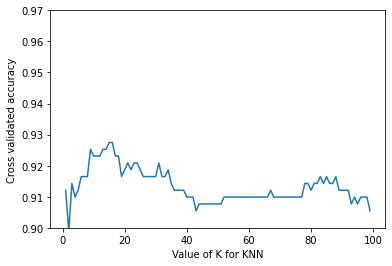

In [0]:
### HERE ###
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2, random_state = 1)
cv_scores = []
k_range = range(1,100,1)
for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())  

## Report your findings on a plot
plt.plot(k_range,cv_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross validated accuracy")
plt.ylim((0.90,0.97))
max_cross_val_score = max(cv_scores) 
max_cross_val_score_classifier = k_range[cv_scores.index(max_cross_val_score)]

## Report mean cross-validation accuracy
print("The mean cross-validation accuracies for a KNN classifier in range 1 to 100 are:", cv_scores )
print("The best 'k'(hyperparameter) value in range 1 to 100 is:", max_cross_val_score_classifier ,", the corresponding accuracy is: %0.2f" %(max_cross_val_score*100), "%")

# **Comment:**

When apply the KNN without standardlizing data, the accuracy decreases from 96.92% to 92.75%.